In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from scipy.stats import norm, gaussian_kde
import matplotlib.pyplot as plt

In [ ]:
MISS_NUM = '48' # 12, 24, 36, 48
DATA_NUM = '14' # 14, 366, 716

In [ ]:
Data = pd.read_csv("Data"+DATA_NUM+"_15min.csv")
num_day  = int(len(Data)/96)
num_time = 96
data = np.reshape(np.array(Data['0']), (num_day,num_time))/np.max(Data['0'])
data_miss = np.array(pd.read_csv("DATA"+DATA_NUM+"_MISS"+MISS_NUM+".csv", index_col=0))

In [ ]:
print("mean: {}".format(round(np.mean(np.array(Data['0'])),4)))
print("std: {}".format(round(np.std(np.array(Data['0'])),4)))
print("min: {}".format(round(min(np.array(Data['0'])),4)))
print("25%: {}".format(round(np.quantile(np.array(Data['0']),0.25),4)))
print("50%: {}".format(round(np.quantile(np.array(Data['0']),0.5),4)))
print("75%: {}".format(round(np.quantile(np.array(Data['0']),0.75),4)))
print("max: {}".format(round(max(np.array(Data['0'])),4)))

mean: 872.042
std: 354.4232
min: 359.4548
25%: 577.4333
50%: 688.5184
75%: 1198.8815
max: 2585.3501


In [ ]:
range1 = [6*x-6 for x in range(1,62)]
range2 = [6*x-5 for x in range(1,62)]
range3 = [6*x-4 for x in range(1,62)]
range4 = [6*x-3 for x in range(1,62)]
range5 = [6*x-2 for x in range(1,62)]
range6 = [6*x-1 for x in range(1,62)]

range_test = range6

l = int(MISS_NUM)
mean_corrector_test = 96/l

data_test       = data[range_test]
data_test_miss  = data_miss[range_test]

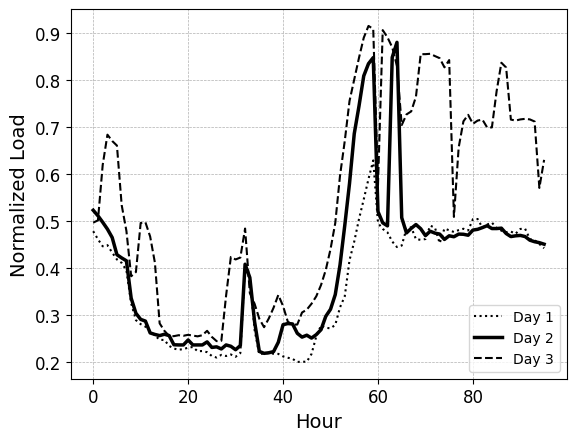

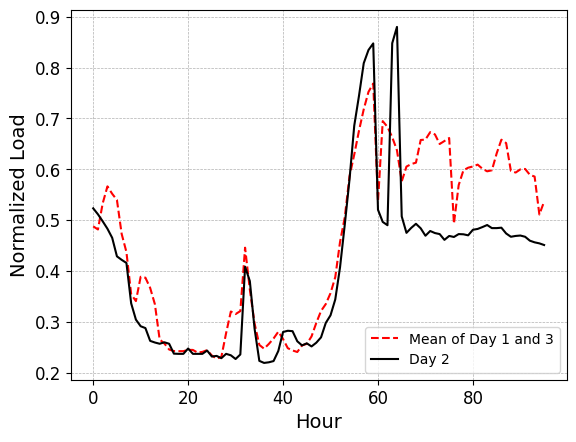

In [ ]:
fig_eg_HA1 = plt.figure()
plt.plot(range(96), data_test[0], 'k:', linewidth=1.5, label='Day 1')
plt.plot(range(96), data_test[1], 'k', linewidth=2.5, label='Day 2')
plt.plot(range(96), data_test[2], 'k--', linewidth=1.5, label='Day 3')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Normalized Load", fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=10, loc=4)
plt.show()
fig_eg_HA1.savefig('fig_eg_HA1.pdf', bbox_inches='tight', format='pdf', dpi=1000)

fig_eg_HA2 = plt.figure()
plt.plot(range(96), 0.5*(data_test[0]+data_test[2]), 'r--', linewidth=1.5, label='Mean of Day 1 and 3')
plt.plot(range(96), data_test[1], 'k', label='Day 2')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Normalized Load", fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=10, loc=4)
plt.show()
fig_eg_HA2.savefig('fig_eg_HA2.pdf', bbox_inches='tight', format='pdf', dpi=1000)

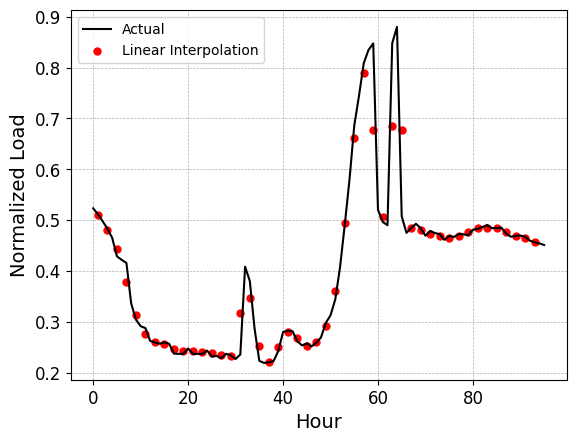

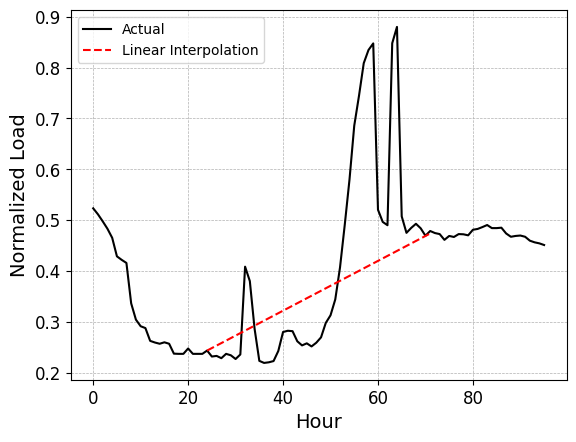

In [ ]:
hour_odd = (2*np.array(range(48))+1)[:-1]
LI_odd = np.array([(data_test[1][x-1]+data_test[1][x+1])/2 for x in hour_odd])

fig_eg_LI1 = plt.figure()
plt.plot(range(96), data_test[1], 'k', label='Actual')
plt.scatter(hour_odd, LI_odd, s=5**2, c='r', label='Linear Interpolation')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Normalized Load", fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=10, loc=2)
plt.show()
fig_eg_LI1.savefig('fig_eg_LI1.pdf', bbox_inches='tight', format='pdf', dpi=1000)

hour_block = np.array(range(24, 72))
LI_block = (data_test[1][71] - data_test[1][24])*(hour_block-24)/48 + data_test[1][24]

fig_eg_LI2 = plt.figure()
plt.plot(range(96), data_test[1], 'k', label='Actual')
plt.plot(hour_block, LI_block, 'r--', label='Linear Interpolation')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Normalized Load", fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=10, loc=2)
plt.show()
fig_eg_LI2.savefig('fig_eg_LI2.pdf', bbox_inches='tight', format='pdf', dpi=1000)

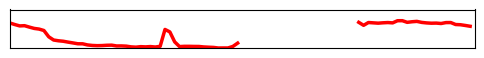

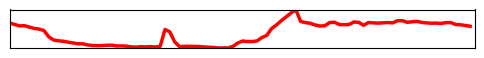

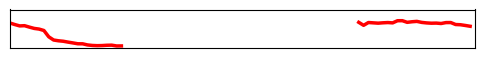

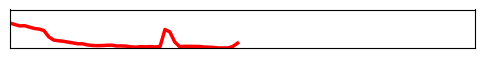

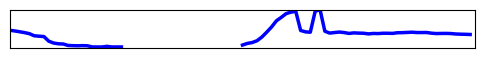

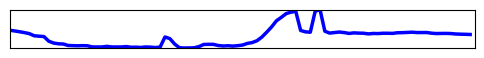

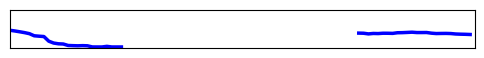

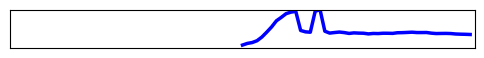

In [ ]:
fig_eg_AE1_1 = plt.figure(figsize=(6,0.5))
plt.plot(range(48), data_test[0][:48], 'r', linewidth=2.5)
plt.plot(range(72,96), data_test[0][72:96], 'r', linewidth=2.5)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.xlim([0,96])
plt.ylim([min(data_test[0]),max(data_test[0])])
plt.show()

fig_eg_AE1_2 = plt.figure(figsize=(6,0.5))
plt.plot(range(96), data_test[0], 'r', linewidth=2.5)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.xlim([0,96])
plt.ylim([min(data_test[0]),max(data_test[0])])
plt.show()

fig_eg_AE1_3 = plt.figure(figsize=(6,0.5))
plt.plot(range(24), data_test[0][:24], 'r', linewidth=2.5)
plt.plot(range(72,96), data_test[0][72:96], 'r', linewidth=2.5)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.xlim([0,96])
plt.ylim([min(data_test[0]),max(data_test[0])])
plt.show()

fig_eg_AE1_4 = plt.figure(figsize=(6,0.5))
plt.plot(range(48), data_test[0][:48], 'r', linewidth=2.5)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.xlim([0,96])
plt.ylim([min(data_test[0]),max(data_test[0])])
plt.show()

fig_eg_AE2_1 = plt.figure(figsize=(6,0.5))
plt.plot(range(24), data_test[1][:24], 'b', linewidth=2.5)
plt.plot(range(48,96), data_test[1][48:96], 'b', linewidth=2.5)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.xlim([0,96])
plt.ylim([min(data_test[1]),max(data_test[1])])
plt.show()

fig_eg_AE2_2 = plt.figure(figsize=(6,0.5))
plt.plot(range(96), data_test[1], 'b', linewidth=2.5)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.xlim([0,96])
plt.ylim([min(data_test[1]),max(data_test[1])])
plt.show()

fig_eg_AE2_3 = plt.figure(figsize=(6,0.5))
plt.plot(range(24), data_test[1][:24], 'b', linewidth=2.5)
plt.plot(range(72,96), data_test[1][72:96], 'b', linewidth=2.5)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.xlim([0,96])
plt.ylim([min(data_test[1]),max(data_test[1])])
plt.show()

fig_eg_AE2_4 = plt.figure(figsize=(6,0.5))
plt.plot(range(48,96), data_test[1][48:96], 'b', linewidth=2.5)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.xlim([0,96])
plt.ylim([min(data_test[1]),max(data_test[1])])
plt.show()

In [ ]:
# Historical Average

data_test_HA = data_test_miss.copy()
for i in range(len(data_test_HA)):
    j = np.where(data_test_miss[i]==0)[0][0]
    d1 = max(range_test[i % len(range_test)] - 1, 0)
    d2 = min(range_test[i % len(range_test)] + 1, len(data)-1)
    data_test_HA[i][j:j+l] = 0.5*(data[d1][j:j+l] + data[d2][j:j+l])
data_test_HA[data_test_miss != 0] = 0

mse_test = np.mean(np.square(data_test_HA - (data_test - data_test_miss)))*mean_corrector_test
mae_test = np.mean(np.abs(data_test_HA - (data_test - data_test_miss)))*mean_corrector_test

NRMSE_test_HA = round(100*np.sqrt(mse_test),2)
NMAE_test_HA  = round(100*mae_test,2)

In [ ]:
# Linear Interpolation

def LI(v_left, v_right):
    x = np.array(range(1,l+1))
    y = (v_right - v_left)*x/(l+1) + v_left
    return y

data_test_LI = data_test_miss.copy()
for i in range(len(data_test_LI)):
    j = np.where(data_test_miss[i]==0)[0][0]
    j_left  = np.where(data_test_miss[i]==0)[0][0] - 1
    j_right = np.where(data_test_miss[i]==0)[0][-1] + 1
    v_left  = data_test_miss[i][j_left]
    v_right = data_test_miss[i][j_right]
    data_test_LI[i][j:j+l] = LI(v_left, v_right)
data_test_LI[data_test_miss != 0] = 0

mse_test = np.mean(np.square(data_test_LI - (data_test - data_test_miss)))*mean_corrector_test
mae_test = np.mean(np.abs(data_test_LI - (data_test - data_test_miss)))*mean_corrector_test

NRMSE_test_LI = round(100*np.sqrt(mse_test),2)
NMAE_test_LI  = round(100*mae_test,2)

In [ ]:
# AE

class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.fc1 = nn.Linear(96, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 64)
        self.fc4 = nn.Linear(64, 96)
        self.activation = nn.Sigmoid() #nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        z = self.fc2(x)
        y = self.activation(z)
        y = self.fc3(y)
        y = self.activation(y)
        y = self.fc4(y)
        return z, y

    def decoder(self, z):
        y = self.activation(z)
        y = self.fc3(y)
        y = self.activation(y)
        y = self.fc4(y)
        return y

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(32, 64),
            nn.Sigmoid(),
            nn.Linear(64, 64),
            nn.Sigmoid(),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, z):
        validity = self.model(z)
        return validity

In [ ]:
dae = AE()

dae.load_state_dict(torch.load('DAE_'+DATA_NUM+'_'+MISS_NUM+'.pt'))

data_test_DAE  = dae.forward(torch.tensor(data_test_miss, dtype=torch.float))[1].detach().numpy()

data_test_DAE[data_test_miss != 0] = 0

mse_test = np.mean(np.square(data_test_DAE - (data_test - data_test_miss)))*mean_corrector_test
mae_test = np.mean(np.abs(data_test_DAE - (data_test - data_test_miss)))*mean_corrector_test

NRMSE_test_DAE = round(100*np.sqrt(mse_test),2)
NMAE_test_DAE  = round(100*mae_test,2)

In [ ]:
mae = AE()

mae.load_state_dict(torch.load('MAE_'+DATA_NUM+'_'+MISS_NUM+'.pt'))

data_test_MAE  = mae.forward(torch.tensor(data_test_miss, dtype=torch.float))[1].detach().numpy()

data_test_MAE[data_test_miss != 0] = 0

mse_test = np.mean(np.square(data_test_MAE - (data_test - data_test_miss)))*mean_corrector_test
mae_test = np.mean(np.abs(data_test_MAE - (data_test - data_test_miss)))*mean_corrector_test

NRMSE_test_MAE = round(100*np.sqrt(mse_test),2)
NMAE_test_MAE  = round(100*mae_test,2)

In [ ]:
dmae1 = AE()

dmae1.load_state_dict(torch.load('DMAE1_'+DATA_NUM+'_'+MISS_NUM+'.pt'))

data_test_DMAE1  = dmae1.forward(torch.tensor(data_test_miss, dtype=torch.float))[1].detach().numpy()

data_test_DMAE1[data_test_miss != 0] = 0

mse_test = np.mean(np.square(data_test_DMAE1 - (data_test - data_test_miss)))*mean_corrector_test
mae_test = np.mean(np.abs(data_test_DMAE1 - (data_test - data_test_miss)))*mean_corrector_test

NRMSE_test_DMAE1 = round(100*np.sqrt(mse_test),2)
NMAE_test_DMAE1  = round(100*mae_test,2)

In [ ]:
dmae2 = AE()

dmae2.load_state_dict(torch.load('DMAE2_'+DATA_NUM+'_'+MISS_NUM+'.pt'))

data_test_DMAE2  = dmae2.forward(torch.tensor(data_test_miss, dtype=torch.float))[1].detach().numpy()

data_test_DMAE2[data_test_miss != 0] = 0

mse_test = np.mean(np.square(data_test_DMAE2 - (data_test - data_test_miss)))*mean_corrector_test
mae_test = np.mean(np.abs(data_test_DMAE2 - (data_test - data_test_miss)))*mean_corrector_test

NRMSE_test_DMAE2 = round(100*np.sqrt(mse_test),2)
NMAE_test_DMAE2  = round(100*mae_test,2)

In [ ]:
print("Historical Average".ljust(40), end="")
print("NRMSE_test: {}%".format(NRMSE_test_HA).ljust(25), end="")
print("NMAE_test: {}%".format(NMAE_test_HA).ljust(25))
print("Linear Interpolation".ljust(40), end="")
print("NRMSE_test: {}%".format(NRMSE_test_LI).ljust(25), end="")
print("NMAE_test: {}%".format(NMAE_test_LI).ljust(25))
print("Denoising Autoencoder".ljust(40), end="")
print("NRMSE_test: {}%".format(NRMSE_test_DAE).ljust(25), end="")
print("NMAE_test: {}%".format(NMAE_test_DAE).ljust(25))
print("Masked Autoencoder".ljust(40), end="")
print("NRMSE_test: {}%".format(NRMSE_test_MAE).ljust(25), end="")
print("NMAE_test: {}%".format(NMAE_test_MAE).ljust(25))
print("Denoising Masked Autoencoder 1".ljust(40), end="")
print("NRMSE_test: {}%".format(NRMSE_test_DMAE1).ljust(25), end="")
print("NMAE_test: {}%".format(NMAE_test_DMAE1).ljust(25))
print("Denoising Masked Autoencoder 2".ljust(40), end="")
print("NRMSE_test: {}%".format(NRMSE_test_DMAE2).ljust(25), end="")
print("NMAE_test: {}%".format(NMAE_test_DMAE2).ljust(25))

Historical Average                      NRMSE_test: 8.35%        NMAE_test: 5.35%         
Linear Interpolation                    NRMSE_test: 10.4%        NMAE_test: 7.73%         
Denoising Autoencoder                   NRMSE_test: 14.82%       NMAE_test: 11.59%        
Masked Autoencoder                      NRMSE_test: 10.66%       NMAE_test: 6.04%         
Denoising Masked Autoencoder 1          NRMSE_test: 5.97%        NMAE_test: 3.27%         
Denoising Masked Autoencoder 2          NRMSE_test: 9.84%        NMAE_test: 5.21%         


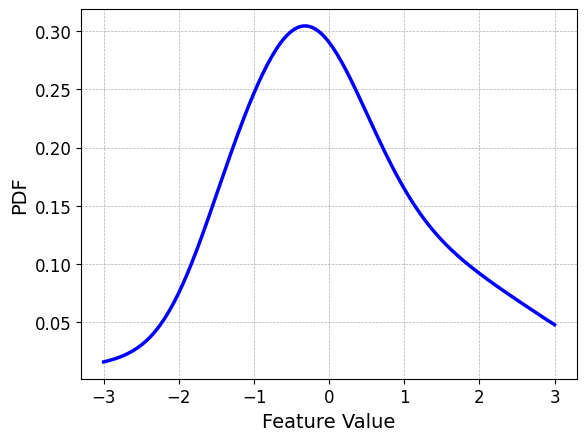

In [ ]:
# Feature PDF

fake_z_dmae1 = dmae1.forward(torch.tensor(data_test_miss, dtype=torch.float))[0].detach().numpy().flatten()
fake_z_dmae2 = dmae2.forward(torch.tensor(data_test_miss, dtype=torch.float))[0].detach().numpy().flatten()

xs = np.linspace(-3.0, 3.0, 200)
pdf_feature_dmae1 = gaussian_kde(fake_z_dmae1)
pdf_feature_dmae2 = gaussian_kde(fake_z_dmae2)
fig_gaussian_pdf = plt.figure()
plt.plot(xs, pdf_feature_dmae1(xs), 'b', linewidth=2.5, label='DMAE1')
#plt.plot(xs, pdf_feature_dmae2(xs), 'b', linewidth=2.5, label='DMAE2')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Feature Value", fontsize=14)
plt.ylabel("PDF", fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)
#plt.legend(fontsize=14, loc=1)
plt.show()
fig_gaussian_pdf.savefig('fig_gaussian_pdf_'+DATA_NUM+'_'+MISS_NUM+'.pdf', bbox_inches='tight', format='pdf', dpi=1000)

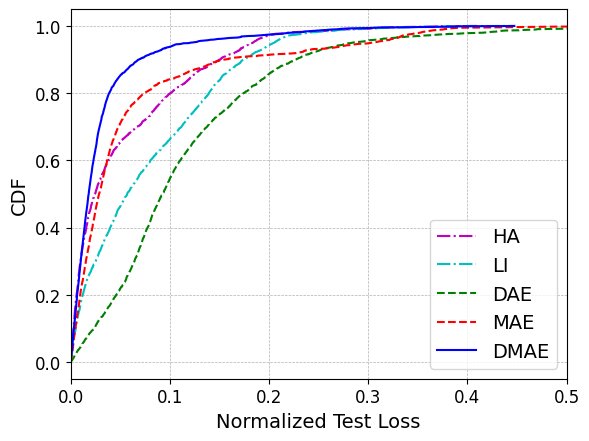

In [ ]:
s = int(num_day*num_time/6/(96/int(MISS_NUM)))

test_loss_list_HA = np.sort(np.abs(data_test_HA - (data_test - data_test_miss)).flatten())[-s:]
test_loss_list_LI = np.sort(np.abs(data_test_LI - (data_test - data_test_miss)).flatten())[-s:]
test_loss_list_DAE = np.sort(np.abs(data_test_DAE - (data_test - data_test_miss)).flatten())[-s:]
test_loss_list_MAE = np.sort(np.abs(data_test_MAE - (data_test - data_test_miss)).flatten())[-s:]
test_loss_list_DMAE1 = np.sort(np.abs(data_test_DMAE1 - (data_test - data_test_miss)).flatten())[-s:]
test_loss_list_DMAE2 = np.sort(np.abs(data_test_DMAE2 - (data_test - data_test_miss)).flatten())[-s:]

cdf_ha    = np.arange(1, len(test_loss_list_HA)+1) / len(test_loss_list_HA)
cdf_li    = np.arange(1, len(test_loss_list_LI)+1) / len(test_loss_list_LI)
cdf_dae   = np.arange(1, len(test_loss_list_DAE)+1) / len(test_loss_list_DAE)
cdf_mae   = np.arange(1, len(test_loss_list_MAE)+1) / len(test_loss_list_MAE)
cdf_dmae1 = np.arange(1, len(test_loss_list_DMAE1)+1) / len(test_loss_list_DMAE1)
cdf_dmae2 = np.arange(1, len(test_loss_list_DMAE2)+1) / len(test_loss_list_DMAE2)
fig_cdf = plt.figure()
plt.plot(test_loss_list_HA, cdf_ha, 'm-.', label='HA')
plt.plot(test_loss_list_LI, cdf_li, 'c-.', label='LI')
plt.plot(test_loss_list_DAE, cdf_dae, 'g--', label='DAE')
plt.plot(test_loss_list_MAE, cdf_mae, 'r--', label='MAE')
plt.plot(test_loss_list_DMAE1, cdf_dmae1, 'b', label='DMAE')
#plt.plot(test_loss_list_DMAE2, cdf_dmae2, 'b', label='DMAE2')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Normalized Test Loss", fontsize=14)
plt.ylabel("CDF", fontsize=14)
plt.xlim([0.0,0.5])
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=14, loc=4)
plt.show()
fig_cdf.savefig('fig_cdf_'+DATA_NUM+'_'+MISS_NUM+'.pdf', bbox_inches='tight', format='pdf', dpi=1000)

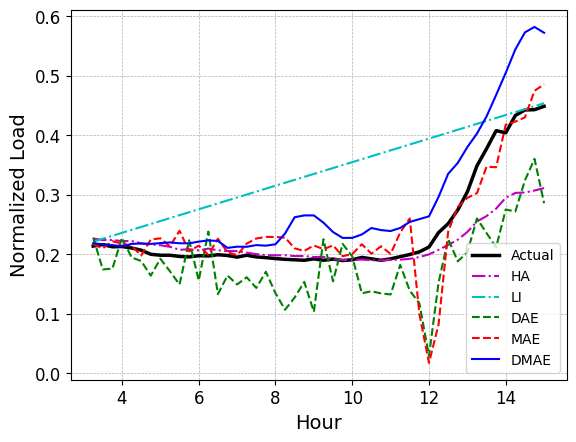

In [ ]:
# Example (DATA14_MISS36: 24 / DATA14_MISS48: 24)
# Example (DATA366_MISS36: 24 / DATA366_MISS48: 24)
# Example (DATA716_MISS36: 25 / DATA716_MISS48: 25)
eg = 25

hour = []
data_eg_actual = []
data_eg_HA    = []; data_eg_LI    = []
data_eg_DAE   = []; data_eg_MAE   = [];
data_eg_DMAE1 = []; data_eg_DMAE2 = []
for i in range(num_time):
    if not np.isclose(data_test_HA[eg][i], 0.0):
        hour += [(i+1)/4]
        data_eg_actual += [data_test[eg][i]]
        data_eg_HA    += [data_test_HA[eg][i]]
        data_eg_LI    += [data_test_LI[eg][i]]
        data_eg_DAE   += [data_test_DAE[eg][i]]
        data_eg_MAE   += [data_test_MAE[eg][i]]
        data_eg_DMAE1 += [data_test_DMAE1[eg][i]]
        data_eg_DMAE2 += [data_test_DMAE2[eg][i]]

fig_eg = plt.figure()
plt.plot(hour, np.abs(data_eg_actual), 'k', linewidth=2.5, label='Actual')
plt.plot(hour, np.abs(data_eg_HA), 'm-.', label='HA')
plt.plot(hour, np.abs(data_eg_LI), 'c-.', label='LI')
plt.plot(hour, np.abs(data_eg_DAE), 'g--', label='DAE')
plt.plot(hour, np.abs(data_eg_MAE), 'r--', label='MAE')
plt.plot(hour, np.abs(data_eg_DMAE1), 'b', label='DMAE')
#plt.plot(hour, np.abs(data_eg_DMAE2), 'b', label='DMAE2')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Normalized Load", fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=10, loc=4)
plt.show()
fig_eg.savefig('fig_eg_'+DATA_NUM+'_'+MISS_NUM+'.pdf', bbox_inches='tight', format='pdf', dpi=1000)